In [2]:
!unzip images.zip -d images

Archive:  images.zip
  inflating: images/cat.jpg          
  inflating: images/dog.jpg          
  inflating: images/fashion-mnist-sprite.png  
  inflating: images/gray_image.jpg   
  inflating: images/hand_writing_image.jpg  
  inflating: images/image_1.jpg      
  inflating: images/image_2.png      
보간법.png:  mismatching "local" filename (ы│┤ъ░Ды▓Х.png),
         continuing with "central" filename version
  inflating: images/보간법.png    


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!ls -l images

total 1764
-rw-r--r-- 1 root root  71670 Dec  8  2019 cat.jpg
-rw-r--r-- 1 root root  23346 Dec  8  2019 dog.jpg
-rw-r--r-- 1 root root 790450 Jul  1  2020 fashion-mnist-sprite.png
-rw-r--r-- 1 root root   8770 Dec  8  2019 gray_image.jpg
-rw-r--r-- 1 root root  12523 Dec  8  2019 hand_writing_image.jpg
-rw-r--r-- 1 root root  38811 Dec  8  2019 image_1.jpg
-rw-r--r-- 1 root root 699714 Dec  8  2019 image_2.png
-rw-r--r-- 1 root root 146121 Dec  8  2019 보간법.png


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

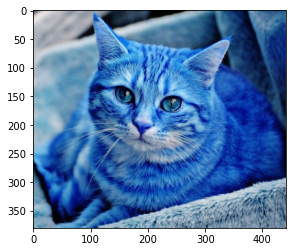

In [5]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
plt.imshow(image)

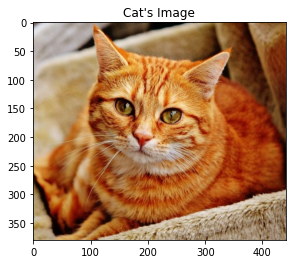

In [9]:
cat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #BGR을 RGB로 바꿔줘야함
plt.title("Cat's Image")
plt.imshow(cat);

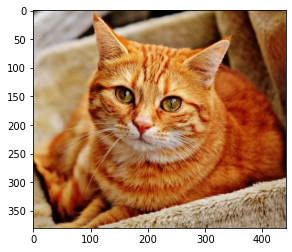

In [10]:
b, g, r = cv2.split(image)
image = cv2.merge([r, g, b]) # 이미지를 각각 분리> b,r을 바꿔서 Merge)
plt.imshow(image);

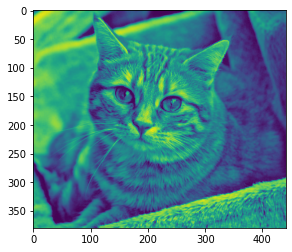

In [11]:
#그레이스케일이미지
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage);

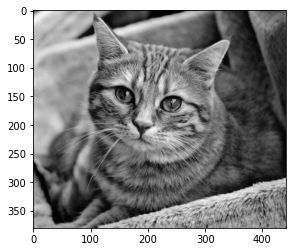

In [12]:
plt.imshow(grayImage, cmap=plt.get_cmap('gray'));

### 이미지 연산

In [31]:
#픽셀정보확인
image = cv2.imread('images/image_2.png')
print(image.shape) #크기(720, 1280, 3)컬러
print(image.size) #픽셀수2764800

(720, 1280, 3)
2764800


In [32]:
# 이미지 Numpy 객체의 특정 픽셀을 가리킵니다.
px = image[100, 100]
# B, G, R 순서로 출력됩니다.
# (단, Gray Scale인 경우에는 B, G, R로 구분되지 않습니다.)
print(px)

# R 값만 출력하기
print(px[2])

[0 0 0]
0


In [42]:
#OpenCV를 활용한 특정 범위 픽셀 변경(이미지를 넘파이로 반환해주니까 )
image = cv2.imread('images/cat.jpg')
import time
start_time = time.time()
for i in range(0, 100):
  for j in range(0, 100):
    image[i,j] = [255, 255, 255]
print("--- %s seconds ---"% (time.time() - start_time))

--- 0.016292572021484375 seconds ---


In [43]:
basicImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

start_time = time.time()
image[0:100, 0:100] = [0, 0, 0]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00019621849060058594 seconds ---


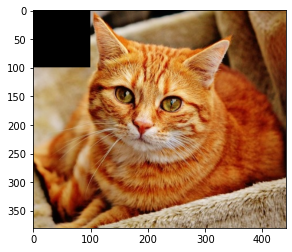

In [44]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#### OpenCV를 활용한 ROI(Region of Interest: 관심 있는 영역) 추출

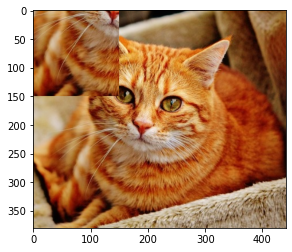

In [45]:
# Numpy Slicing: ROI 처리 가능
roi = image[200:350, 50:200]

# ROI 단위로 이미지 복사하기
image[0:150, 0:150] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### OpenCV를 활용한 픽셀별 색상 다루기

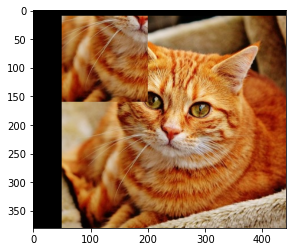

In [46]:
# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]

M = np.float32([[1, 0, 50], [0, 1, 10]])
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

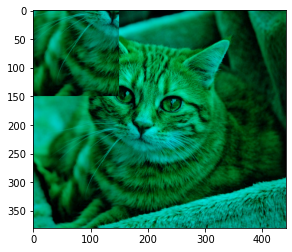

In [51]:
image[:, :, 2] = 0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

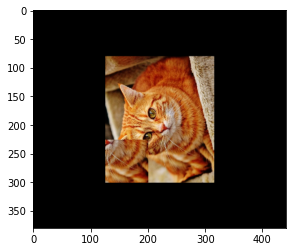

In [47]:
# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5) #90도돌아서 사이즈0.5반줄어들음
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지합치기

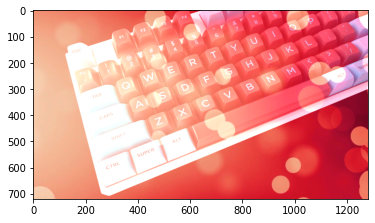

In [49]:
image_1 = cv2.imread('images/image_1.jpg')
image_2 = cv2.imread('images/image_2.png')

#Saturation연산으로 이미지 합치기
result = cv2.add(image_1, image_2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

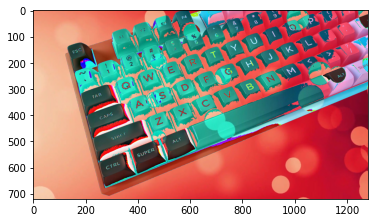

In [50]:
#Modulo연산으로 이미지 합치기
result = image_1 + image_2
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()